# Donovan Feist

# CH EN 3603

# Homework 11

# Problem 1

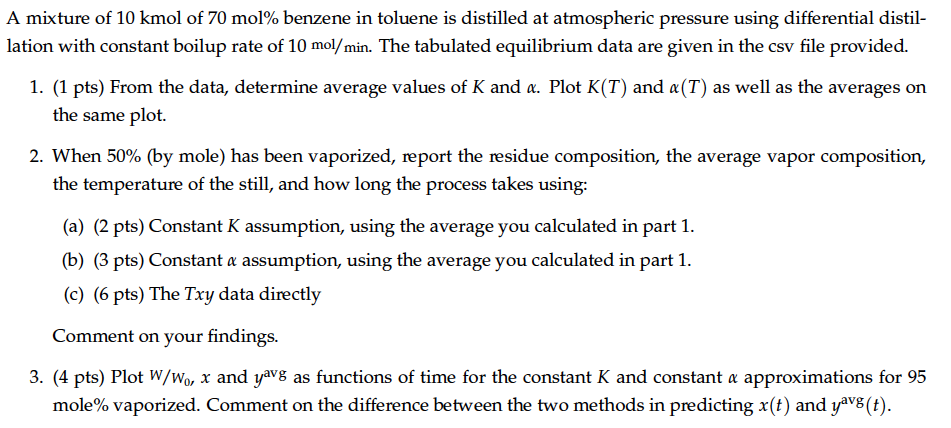

## part 1 solution

In [1]:
# Load t h e c s v d a t a us ing Pandas then gr a b numpy a r r a y s f o r t h e Txy d a t a
import pandas as pd
import numpy as np
data=pd.read_csv('Txy.csv')
Teq=data['T'].values
xeq=data['x'].values
yeq=data['y'].values

### $K=\frac{y}{x}$

### $\alpha=\frac{y/x}{(1-y)/(1-x)}$

In [2]:
K=yeq/xeq
K=np.delete(K,[0,49])

α=(yeq/xeq)/((1-yeq)/(1-xeq))
α=np.delete(α,[0,49])

T=np.delete(Teq,[0,49])

Kavg=np.mean(K)
Kavg=np.ones(len(K))*Kavg
αavg=np.mean(α)
αavg=np.ones(len(α))*αavg
print('Kavg=',Kavg[0])
print('αavg=',αavg[0])

Kavg= 1.482829509609142
αavg= 2.4133791816290926


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


### $\boxed{K_{avg}=1.483}$

### $\boxed{\alpha_{avg}=2.413}$

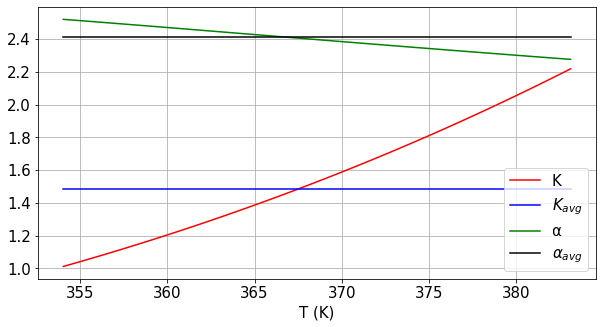

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})
plt.plot(T,K,'r-',label='K')
plt.plot(T,Kavg,'b-',label=r'$K_{avg}$')
plt.plot(T,α,'g-',label='α')
plt.plot(T,αavg,'k-',label=r'$α_{avg}$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('T (K)')
#plt.ylabel('fraction')
plt.show()

## part 2a solution

For constant K

### $\frac{1}{K-1}ln(\frac{x}{x_0})=ln(\frac{W}{W_0})$.

Solving for x $\Rightarrow$

### $x=x_0 exp[(K-1)ln(\frac{W}{W_0})]$

In [5]:
Kavg=1.483
W0=10000 #mol
W=W0/2 #mol
x0=0.70
x=x0*np.exp((Kavg-1)*np.log(W/W0))
print('x=',x)

x= 0.5008417820080193


### $y^{avg}=\frac{x_0 W_0-x W}{W_0-W}$

In [6]:
yavg=(x0*W0-x*W)/(W0-W)
print('yavg=',yavg)

yavg= 0.8991582179919806


Interpolation of the equilibrium data is done to find the temperature at which the residue composition is equal to x.

In [7]:
T=np.interp(x,xeq,Teq)
print('T=',T,'K')

T= 365.71718998276737 K


### $t=\frac{W_0-W}{D}$

In [19]:
D=10 #mol/min
t=(W0-W)/D #min
print('t=',t,'min')

t= 500.0 min


$\boxed{x_{residue}=0.501}$

$\boxed{y^{avg}=0.899}$

$\boxed{T=365.72 \space\space K}$

$\boxed{t=500 \space\space min}$

## part 2b solution

For constant $\alpha$

### $ln(\frac{W_0}{W})=\frac{1}{\alpha-1} \left[ ln(\frac{x_0}{x})+\alpha ln(\frac{1-x}{1-x_0}) \right]$

A function is created to solve for the left hand side by changing the value of x.

In [9]:
αavg=2.413
def func(x):
    r=np.log(W0/W)-1/(αavg-1)*(np.log(x0/x)+αavg*np.log((1-x)/(1-x0)))
    return r

from scipy.optimize import fsolve

sol=fsolve(func,0.5)
print('x=',sol)

x= [0.58274483]


### $y^{avg}=\frac{x_0 W_0-x W}{W_0-W}$

In [12]:
yavg=(x0*W0-sol*W)/(W0-W)
print('yavg=',yavg)

yavg= [0.81725517]


Interpolation of the equilibrium data is done to find the temperature at which the residue composition is equal to x.

In [13]:
T=np.interp(sol,xeq,Teq)
print('T=',T,'K')

T= [363.40856917] K


### $t=\frac{W_0-W}{D}$

In [20]:
t=(W0-W)/D #min
print('t=',t,'min')

t= 500.0 min


$\boxed{x_{residue}=0.583}$

$\boxed{y^{avg}=0.817}$

$\boxed{T=363.41 \space\space K}$

$\boxed{t=500 \space\space min}$

## part 2c solution

We know that

### $\int_{x_0}^x \frac{1}{y-x}=ln(\frac{W}{W_0})$

Since $ln(\frac{W}{W_0})$ and $x_0$ are known quantities, we can vary the value of x until the two sides of the equation are equal. The value of x at which the two sides of the equation are equal will be the correct value of x for the residue.

In [15]:
xnew=np.delete(xeq,[0,49])
ynew=np.delete(yeq,[0,49])

rhs=np.log(W/W0)
x0=0.7
value=0
dx=10**-6
x=x0-0.1
i=0
while value < (-rhs):
    xi=np.linspace(x,x0,len(xnew))
    yi=np.interp(xi,xnew,ynew)
    integrand=1/(yi-xi)
    value=np.trapz(integrand, xi)
    x=x-dx
    i+=1
xfinal=x
print('x=',xfinal)

x= 0.5807729999994471


### $y^{avg}=\frac{x_0 W_0-x W}{W_0-W}$

In [16]:
yavg=(x0*W0-xfinal*W)/(W0-W)
print('yavg=',yavg)

yavg= 0.819227000000553


Interpolation of the equilibrium data is done to find the temperature at which the residue composition is equal to x.

In [17]:
T=np.interp(xfinal,xeq,Teq)
print('T=',T,'K')

T= 363.46240220472845 K


### $t=\frac{W_0-W}{D}$

In [21]:
t=(W0-W)/D #min
print('t=',t,'min')

t= 500.0 min


$\boxed{x_{residue}=0.581}$

$\boxed{y^{avg}=0.819}$

$\boxed{T=363.46 \space\space K}$

$\boxed{t=500 \space\space min=8.33 \space\space hours}$

We can see that the values for $x_{residue}$, ${y^{avg}}$, and T do not differ appreciably between the methods of constant $\alpha$ and using equilibrium data. This indicates that the simplification of using a constant $\alpha$ over the given temperatur range is a reasonable approximation. This conclusion is in agreement with the graph from part 1, which indicates that $\alpha$ doesn't change appreciably over the given temperature range.

We see that the values for $x_{residue}$, ${y^{avg}}$, and T vary noticably between the methods of constant K and using equilibrium data. This indicates that the simplification of using a constant K over the given temperatur range is not a reasonable approximation. This conclusion is in agreement with the graph from part 1, which indicates that K changes appreciably over the given temperature range.

The value for time is equal for all three methods. This makes sense because the equation for calculating time is $t=\frac{W_0-W}{D}$, which doesn't depend on x, y, or temperature. Therefore, regardless of the method used to calculate $x_{residue}$, ${y^{avg}}$, and T, the calculated time value will be the same for all three methods.

## part 3 solution

### $t=\frac{W_0-W}{D} \Rightarrow$

### $tD+W=W_0 \Rightarrow$

### $\frac{W}{W_0}=1-\frac{tD}{W_0}$

$\frac{W}{W_0}$ is then plotted against time.

For constant K

### $\frac{1}{K-1}ln(\frac{x}{x_0})=ln(\frac{W}{W_0})$.

Solving for x $\Rightarrow$

### $x=x_0 exp[(K-1)ln(\frac{W}{W_0})]$

x is then plotted against time.

### $y^{avg}=\frac{x_0 W_0-x W}{W_0-W}$

$x_0$, x, and $W_0$ are already known. W can be found by multiplying the $\frac{W}{W_0}$ array by $W_0$.

$y^{avg}$ is then plotted against time.

For constant $\alpha$

### $ln(\frac{W_0}{W})=\frac{1}{\alpha-1} \left[ ln(\frac{x_0}{x})+\alpha ln(\frac{1-x}{1-x_0}) \right]$

A function is created to solve for the left hand side by changing the value of x.

$y^{avg}$ for constant $\alpha$ is calculated in the same way as for constant K.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


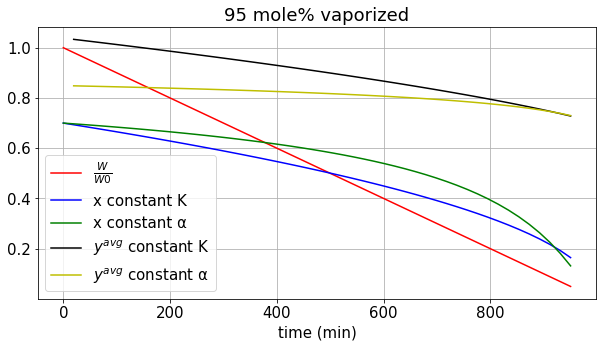

In [55]:
#creating W/W0 array
W0=10000 #mol
Wfinal=(1-0.95)*W0 #mol
D=10 #mol/min
t_total=(W0-Wfinal)/D #min
t=np.linspace(0,t_total) #min
WoW0=1-t*D/W0

#creating x array for constant K
Kavg=1.483
x0=0.70
x=x0*np.exp((Kavg-1)*np.log(WoW0))

#creating yavg array for constant K
W=WoW0*W0
yavg=(x0*W0-x*W)/(W0-W)
ytest=yavg*(W0-W)

#creating x array for constant α
αavg=2.413
def func(x):
    r=-np.log(WoW0[i])-1/(αavg-1)*(np.log(x0/x)+αavg*np.log((1-x)/(1-x0)))
    return r
sol=np.ones(len(WoW0))
i=0
for i in range(0,len(WoW0)):
    sol[i]=fsolve(func,0.5)

#creating yavg array for constant α
yavg2=(x0*W0-sol*W)/(W0-W)

#plotting
plt.figure(figsize=(10,5))
plt.plot(t,WoW0,'r-',label=r'$\frac{W}{W0}$')
plt.plot(t,x,'b-',label='x constant K')
plt.plot(t,sol,'g-',label='x constant α')
plt.plot(t,yavg,'k-',label=r'$y^{avg}$ constant K')
plt.plot(t,yavg2,'y-',label=r'$y^{avg}$ constant α')
plt.grid()
plt.xlabel('time (min)')
plt.title('95 mole% vaporized')
plt.legend(loc='best')
plt.show()

We can see that when the vaporization begins, the calculated $y^{avg}$ values calculated with constant K are greater than 1. This indicates that the simplification of using a constant K over the given temperatur range is not a reasonable approximation. This conclusion is in agreement with the graph from part 1, which indicates that K changes appreciably over the given temperature range.